### Drive mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls weather/minnesota_daily

In [ ]:
!ls weather/prediction_targets_daily


#Testing

#Data exploration


In [ ]:
!pip install geopandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:

import geopandas as gpd
from geopandas import GeoDataFrame
from shapely import Point

In [3]:
county_loc_ds = pd.read_csv("agri/minnesota_county_location.csv")
county_loc_ds

,county_name,capital_name,county_latitude,county_longitude
0,Aitkin County,Aitkin,46.571482,-93.384760
1,Anoka County,Anoka,45.271020,-93.282763
2,Becker County,Detroit Lakes,46.817181,-95.845325
3,Beltrami County,Bemidji,47.478542,-94.890787
4,Benton County,Foley,45.663512,-93.913728
...,...,...,...,...
82,Watonwan County,St. James,43.982458,-94.626918
83,Wilkin County,Breckenridge,46.265205,-96.581626
84,Winona County,Winona,43.958227,-91.780778
85,Wright County,Buffalo,45.171908,-93.874694


In [4]:
country_yr_prd_ds = pd.read_csv("agri/minnesota_county_yearly_agricultural_production.csv")
country_yr_prd_ds

,Year,County,Commodity,Crop,ACRES HARVESTED,"PRODUCTION, MEASURED IN BU","YIELD, MEASURED IN BU / ACRE"
0,1950,AITKIN,BARLEY,BARLEY,600,"16,200",27.0
1,1950,AITKIN,CORN,"CORN, GRAIN","4,800","72,000",15.0
2,1950,AITKIN,FLAXSEED,FLAXSEED,"1,000","7,000",7.0
3,1950,AITKIN,HAY,HAY,"49,200",NaN,NaN
4,1950,AITKIN,OATS,OATS,"7,900","213,300",27.0
...,...,...,...,...,...,...,...
56263,2021,WRIGHT,CORN,"CORN, GRAIN","76,600","11,092,000",144.8
56264,2021,WRIGHT,OATS,OATS,"1,350","65,600",48.6
56265,2021,WRIGHT,SOYBEANS,SOYBEANS,"71,100","3,278,000",46.1
56266,2021,WRIGHT,WHEAT,"WHEAT, SPRING, (EXCL DURUM)","1,110","51,200",46.1


## Mapping

State boundaries shape <br>
https://gisdata.mn.gov/dataset/bdry-state-of-minnesota <br>
County boundaries shape <br>
https://gisdata.mn.gov/dataset/bdry-counties-in-minnesota

In [ ]:
!ls 

'ls' is not recognized as an internal or external command,
operable program or batch file.


<AxesSubplot:>

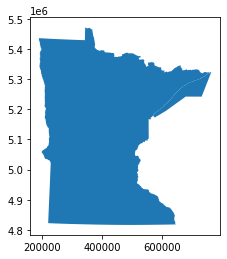

In [8]:
state_map = gpd.read_file("bdry_state_of_minnesota.gpkg")
state_map.plot()

<AxesSubplot:>

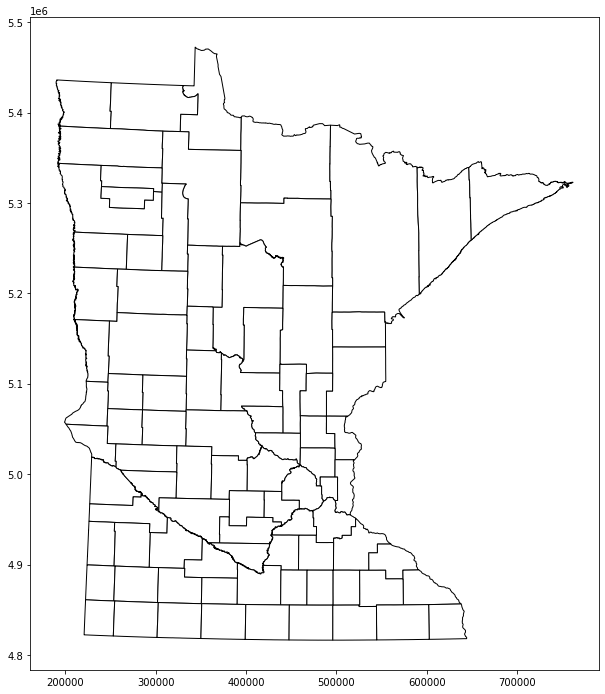

In [7]:
counties_map = gpd.read_file("bdry_counties_in_minnesota.gpkg")
counties_map.plot(figsize =(12,12),color="white", edgecolor="black")

In [8]:
counties_map

,AREA,PERIMETER,CTYONLY_,CTYONLY_ID,COUN,CTY_NAME,CTY_ABBR,CTY_FIPS,geometry
0,4.608321e+09,388250.145723,2.0,1.0,39,Lake of the Woods,LOTW,77,"MULTIPOLYGON (((330081.663 5429937.085, 330973..."
1,2.862184e+09,263017.482774,3.0,2.0,35,Kittson,KITT,69,"MULTIPOLYGON (((250934.678 5433053.183, 250908..."
2,4.347099e+09,302590.752930,4.0,3.0,68,Roseau,ROSE,135,"MULTIPOLYGON (((250934.678 5433053.183, 251190..."
3,8.167238e+09,412897.435943,5.0,4.0,36,Koochiching,KOOC,71,"MULTIPOLYGON (((394785.782 5395220.852, 395221..."
4,4.698732e+09,374207.651291,6.0,5.0,45,Marshall,MARS,89,"MULTIPOLYGON (((249941.883 5382327.086, 251522..."
...,...,...,...,...,...,...,...,...,...
112,8.844817e+03,419.521202,114.0,113.0,16,Cook,COOK,31,"MULTIPOLYGON (((754614.628 5317647.962, 754616..."
113,4.638027e+03,312.399385,115.0,114.0,16,Cook,COOK,31,"MULTIPOLYGON (((755151.634 5317121.803, 755169..."
114,6.627648e+04,2644.849287,116.0,115.0,16,Cook,COOK,31,"MULTIPOLYGON (((656853.113 5265231.379, 656857..."
115,6.915989e+02,103.083929,117.0,116.0,38,Lake,LAKE,75,"MULTIPOLYGON (((631078.163 5236647.598, 631081..."


In [9]:
county_loc_ds

,county_name,capital_name,county_latitude,county_longitude
0,Aitkin County,Aitkin,46.571482,-93.384760
1,Anoka County,Anoka,45.271020,-93.282763
2,Becker County,Detroit Lakes,46.817181,-95.845325
3,Beltrami County,Bemidji,47.478542,-94.890787
4,Benton County,Foley,45.663512,-93.913728
...,...,...,...,...
82,Watonwan County,St. James,43.982458,-94.626918
83,Wilkin County,Breckenridge,46.265205,-96.581626
84,Winona County,Winona,43.958227,-91.780778
85,Wright County,Buffalo,45.171908,-93.874694


0     Annotation(360108, 5.40364e+06, 'LOTW')
1     Annotation(222122, 5.40952e+06, 'KITT')
2     Annotation(293494, 5.40629e+06, 'ROSE')
3     Annotation(441843, 5.34385e+06, 'KOOC')
4     Annotation(250474, 5.36166e+06, 'MARS')
                       ...                   
82    Annotation(621507, 4.83648e+06, 'HOUS')
83     Annotation(423580, 4.8361e+06, 'FARI')
84    Annotation(573346, 4.83607e+06, 'FILL')
85    Annotation(471880, 4.83571e+06, 'FREE')
86    Annotation(519956, 4.83541e+06, 'MOWE')
Length: 87, dtype: object

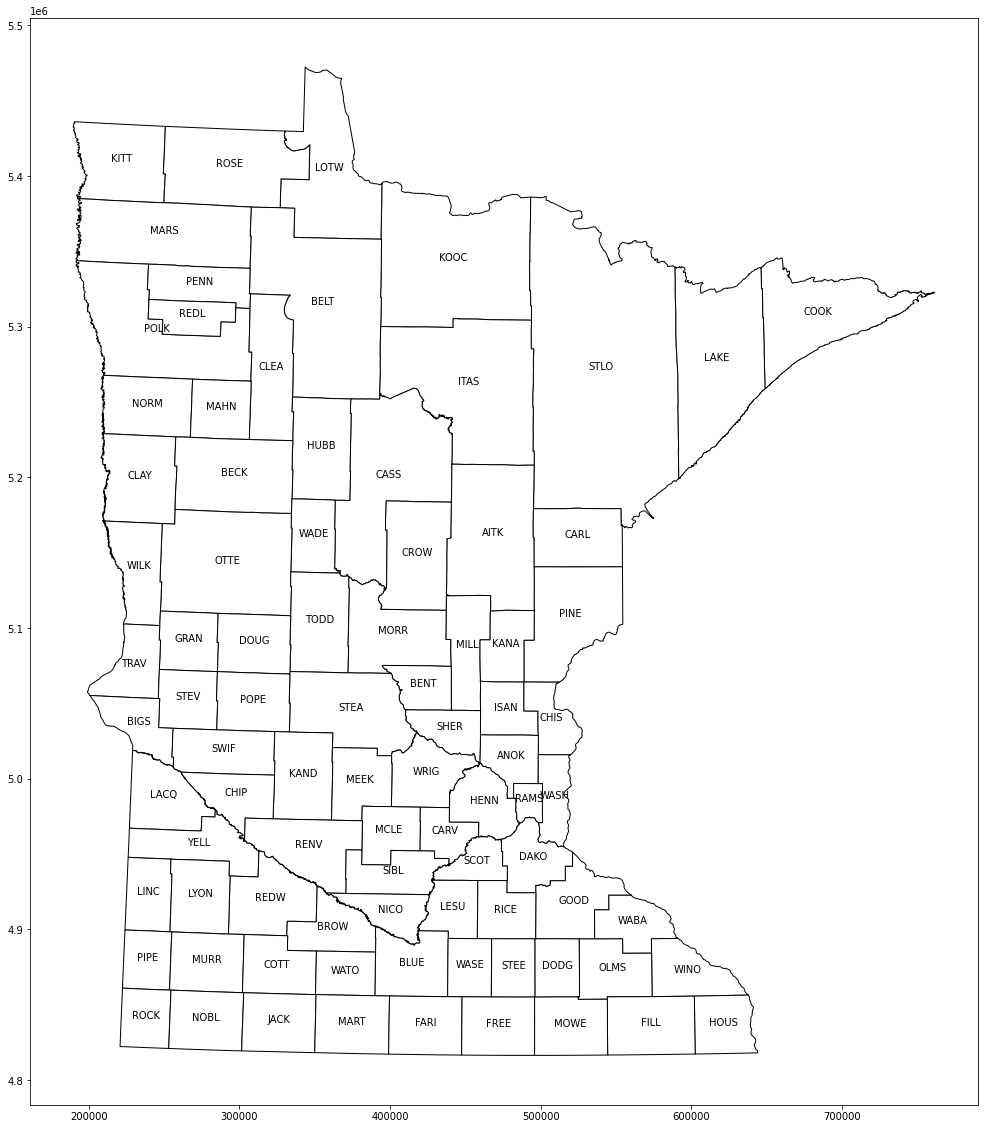

In [10]:
counties_map= counties_map.drop_duplicates(subset=['CTY_ABBR'])
ax = counties_map.plot(figsize =(20,20),color="white", edgecolor="black")
plt.rcParams.update({'font.size': 10})
counties_map.apply(lambda x: ax.annotate(text=x['CTY_ABBR'],xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

In [11]:
station_pos = pd.read_csv("weather/Minnesota Station location list.csv")
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(station_pos['Longitude'], station_pos['Latitude'])]
station_pos = gpd.GeoDataFrame(station_pos, 
                          crs = crs, 
                          geometry = geometry)
counties_map.crs


C:\Users\XY\AppData\Roaming\Python\Python39\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Projected CRS: EPSG:26915>
Name: NAD83 / UTM zone 15N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 96°W and 90°W - onshore and offshore. Canada - Manitoba; Nunavut; Ontario. United States (USA) - Arkansas; Illinois; Iowa; Kansas; Louisiana; Michigan; Minnesota; Mississippi; Missouri; Nebraska; Oklahoma; Tennessee; Texas; Wisconsin.
- bounds: (-96.0, 25.61, -90.0, 84.0)
Coordinate Operation:
- name: UTM zone 15N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [12]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(county_loc_ds['county_longitude'], county_loc_ds['county_latitude'])]
counties_gds = gpd.GeoDataFrame(county_loc_ds, 
                          crs = crs, 
                          geometry = geometry)
counties_gds.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
import matplotlib as plt
counties_map= counties_map.drop_duplicates(subset=['CTY_ABBR'])
counties_map = counties_map.to_crs("EPSG:4326")
fig, ax = plt.pyplot.subplots(figsize = (15,15))
counties_map.plot(color="white", edgecolor="black",ax=ax)
plt.rcParams.update({'font.size': 10})
#counties_map.apply(lambda x: ax.annotate(text=x['CTY_ABBR'],xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
#station_pos = station_pos.to_crs("EPSG:26915")
station_pos.apply(lambda x: ax.annotate(text=x['Code'],xy=x.geometry.centroid.coords[0], ha='right') if (x['Code'] == "KAIT0") else None , axis=1)
station_pos.plot(ax=ax)
counties_gds.apply(lambda x: ax.annotate(text=x['county_name'],xy=x.geometry.centroid.coords[0] if (x['capital_name'] == "Aitkin") else None , ha='left'), axis=1)
counties_gds.plot(ax=ax,color="red")

Without annotation


<AxesSubplot:>

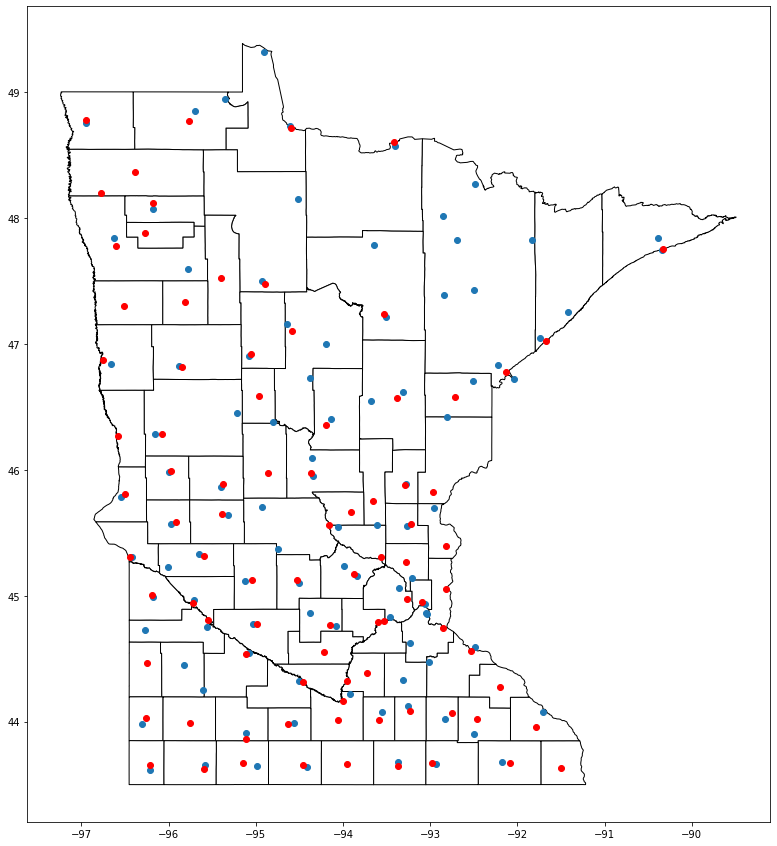

In [14]:
counties_map= counties_map.drop_duplicates(subset=['CTY_ABBR'])
counties_map = counties_map.to_crs("EPSG:4326")
fig, ax = plt.pyplot.subplots(figsize = (15,15))
counties_map.plot(color="white", edgecolor="black",ax=ax)
plt.rcParams.update({'font.size': 10})
#counties_map.apply(lambda x: ax.annotate(text=x['CTY_ABBR'],xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
#station_pos = station_pos.to_crs("EPSG:26915")
station_pos.plot(ax=ax)
counties_gds.plot(ax=ax,color="red")

#Data prep

## Datatypes

In [15]:
crop_df = pd.read_csv('agri/minnesota_county_yearly_agricultural_production.csv')

In [16]:
pd.unique(crop_df['Commodity'])

array(['BARLEY', 'CORN', 'FLAXSEED', 'HAY', 'OATS', 'RYE', 'SOYBEANS',
       'WHEAT', 'SUGARBEETS', 'SUNFLOWER', 'BEANS', 'CANOLA'],
      dtype=object)

In [17]:
pd.unique(crop_df['County'])

array(['AITKIN', 'ANOKA', 'BECKER', 'BELTRAMI', 'BENTON', 'BIG STONE',
       'BLUE EARTH', 'BROWN', 'CARLTON', 'CARVER', 'CASS', 'CHIPPEWA',
       'CHISAGO', 'CLAY', 'CLEARWATER', 'COTTONWOOD', 'CROW WING',
       'DOUGLAS', 'FARIBAULT', 'FREEBORN', 'GRANT', 'HENNEPIN', 'HUBBARD',
       'ISANTI', 'ITASCA', 'JACKSON', 'KANABEC', 'KANDIYOHI', 'KITTSON',
       'KOOCHICHING', 'LAC QUI PARLE', 'LAKE', 'LAKE OF THE WOODS',
       'LE SUEUR', 'LINCOLN', 'LYON', 'MAHNOMEN', 'MARSHALL', 'MARTIN',
       'MCLEOD', 'MEEKER', 'MILLE LACS', 'MORRISON', 'MURRAY', 'NICOLLET',
       'NOBLES', 'NORMAN', 'OTTER TAIL', 'PENNINGTON', 'PINE',
       'PIPESTONE', 'POLK', 'POPE', 'RAMSEY', 'RED LAKE', 'REDWOOD',
       'RENVILLE', 'RICE', 'ROCK', 'ROSEAU', 'SCOTT', 'SHERBURNE',
       'SIBLEY', 'ST. LOUIS', 'STEARNS', 'STEELE', 'STEVENS', 'SWIFT',
       'TODD', 'TRAVERSE', 'WADENA', 'WASECA', 'WASHINGTON', 'WATONWAN',
       'WILKIN', 'WRIGHT', 'YELLOW MEDICINE', 'COOK',
       'OTHER (COMBINED) COUNTI

In [18]:
crop_df.loc[crop_df['County'] == "ANOKA"]


,Year,County,Commodity,Crop,ACRES HARVESTED,"PRODUCTION, MEASURED IN BU","YIELD, MEASURED IN BU / ACRE"
11,1950,ANOKA,BARLEY,BARLEY,130,"3,250",25.0
12,1950,ANOKA,CORN,"CORN, GRAIN","20,400","571,200",28.0
13,1950,ANOKA,FLAXSEED,FLAXSEED,10,100,10.0
14,1950,ANOKA,HAY,HAY,"23,500",NaN,NaN
15,1950,ANOKA,OATS,OATS,"8,700","243,600",28.0
...,...,...,...,...,...,...,...
55654,2020,ANOKA,CORN,"CORN, SILAGE",280,NaN,NaN
55655,2020,ANOKA,SOYBEANS,SOYBEANS,"3,240","148,000",45.7
55977,2021,ANOKA,CORN,CORN,NaN,NaN,NaN
55978,2021,ANOKA,CORN,"CORN, GRAIN","4,100","460,000",112.2


Itt a County rövidítésnél feljött egy probléma:

In [19]:
crops = {}
for i in pd.unique(crop_df['County']):
  crops[i] = {}
  for j in pd.unique(crop_df['Commodity']):
    crops[i][j] = crop_df.loc[crop_df['County'] == i].loc[crop_df['Commodity'] == j].copy(deep=True).reset_index(drop=True)

Ha a fenti metódust használjuk a kkor a teljes kódneve benne lesz egy egy megyének ami nem kompatibilis a később kialakított 4 betűs rövidítésekkel ezért máshogy kell majd megcsinálni a crops dict-et

In [11]:
crop_df_counties = pd.unique(crop_df['County'])
crop_df_counties = [ s.replace(' ','')[:4] for s in crop_df_counties]


All kinds of commodities:
``` 'BARLEY', 'CORN', 'FLAXSEED', 'HAY', 'OATS', 'RYE', 'SOYBEANS', 'WHEAT', 'SUGARBEETS', 'SUNFLOWER', //'BEANS', 'CANOLA' ```

In [18]:
crops = {}
for i in pd.unique(crop_df['County']):
  crops[i] = {}
  for j in pd.unique(crop_df['Commodity']):
    crops[i][j] = crop_df.loc[crop_df['County'] == i].loc[crop_df['Commodity'] == j].copy(deep=True).reset_index(drop=True)

In [ ]:
list(crops.keys())

In [20]:
crops['ANOKA']['SUNFLOWER']

,Year,County,Commodity,Crop,ACRES HARVESTED,"PRODUCTION, MEASURED IN BU","YIELD, MEASURED IN BU / ACRE"
0,1977,ANOKA,SUNFLOWER,SUNFLOWER,300,NaN,NaN
1,1977,ANOKA,SUNFLOWER,"SUNFLOWER, OIL TYPE",300,NaN,NaN
2,1978,ANOKA,SUNFLOWER,SUNFLOWER,200,NaN,NaN
3,1978,ANOKA,SUNFLOWER,"SUNFLOWER, OIL TYPE",200,NaN,NaN
4,1979,ANOKA,SUNFLOWER,SUNFLOWER,"1,200",NaN,NaN
5,1979,ANOKA,SUNFLOWER,"SUNFLOWER, NON",400,NaN,NaN
6,1979,ANOKA,SUNFLOWER,"SUNFLOWER, OIL TYPE",800,NaN,NaN
7,1980,ANOKA,SUNFLOWER,SUNFLOWER,600,NaN,NaN
8,1980,ANOKA,SUNFLOWER,"SUNFLOWER, OIL TYPE",600,NaN,NaN
9,1981,ANOKA,SUNFLOWER,SUNFLOWER,200,NaN,NaN


In [21]:
crops.keys()

dict_keys(['AITKIN', 'ANOKA', 'BECKER', 'BELTRAMI', 'BENTON', 'BIG STONE', 'BLUE EARTH', 'BROWN', 'CARLTON', 'CARVER', 'CASS', 'CHIPPEWA', 'CHISAGO', 'CLAY', 'CLEARWATER', 'COTTONWOOD', 'CROW WING', 'DOUGLAS', 'FARIBAULT', 'FREEBORN', 'GRANT', 'HENNEPIN', 'HUBBARD', 'ISANTI', 'ITASCA', 'JACKSON', 'KANABEC', 'KANDIYOHI', 'KITTSON', 'KOOCHICHING', 'LAC QUI PARLE', 'LAKE', 'LAKE OF THE WOODS', 'LE SUEUR', 'LINCOLN', 'LYON', 'MAHNOMEN', 'MARSHALL', 'MARTIN', 'MCLEOD', 'MEEKER', 'MILLE LACS', 'MORRISON', 'MURRAY', 'NICOLLET', 'NOBLES', 'NORMAN', 'OTTER TAIL', 'PENNINGTON', 'PINE', 'PIPESTONE', 'POLK', 'POPE', 'RAMSEY', 'RED LAKE', 'REDWOOD', 'RENVILLE', 'RICE', 'ROCK', 'ROSEAU', 'SCOTT', 'SHERBURNE', 'SIBLEY', 'ST. LOUIS', 'STEARNS', 'STEELE', 'STEVENS', 'SWIFT', 'TODD', 'TRAVERSE', 'WADENA', 'WASECA', 'WASHINGTON', 'WATONWAN', 'WILKIN', 'WRIGHT', 'YELLOW MEDICINE', 'COOK', 'OTHER (COMBINED) COUNTIES'])

In [22]:
import os

station_dict = {key: [] for key in station_pos['Code']}
station_data = os.listdir('weather/minnesota_daily')
path = 'weather/minnesota_daily/'
for i in station_data:
  name = i.split('.')[0]
  station_dict[name]  = pd.read_csv(path+i,header = None,names = ['date','tavg','tmin','tmax','prcp'])
  #station_dict[name]['date'] = pd.to_datetime(station_dict[name]['date'])
  #station_dict[name]=station_dict[name].set_index('date')

In [175]:
import os


target_dict = {}
target_data = os.listdir('weather/prediction_targets_daily/')
path = 'weather/prediction_targets_daily/'
for i in target_data:
  name = i.split('.')[0]
  target_dict[name]  = pd.read_csv(path+i,header = None,names = ['date','tavg','tmin','tmax','prcp'])
  if len(target_dict[name].index)<1:
    del target_dict[name]
  #station_dict[name]['date'] = pd.to_datetime(station_dict[name]['date'])
  #station_dict[name]=station_dict[name].set_index('date')

In [174]:
len(list(target_dict.keys()))

197

In [168]:
len(list(target_dict.keys()))

198

In [41]:
county_ds = pd.read_csv("agri/minnesota_county_location.csv")
station_ds = pd.read_csv("weather/Minnesota Station location list.csv")

In [42]:
county_loc_ds = county_ds[['county_latitude','county_longitude']]
station_loc_ds = station_ds[['Latitude','Longitude']]

In [ ]:
county_loc_ds

,county_latitude,county_longitude
0,46.571482,-93.384760
1,45.271020,-93.282763
2,46.817181,-95.845325
3,47.478542,-94.890787
4,45.663512,-93.913728
...,...,...
82,43.982458,-94.626918
83,46.265205,-96.581626
84,43.958227,-91.780778
85,45.171908,-93.874694


The main idea here is that the closer the weather station the bigger impact it has on the outcome

## distMatrix

In [24]:
def distance_matrix(a,b):
  
  res = np.zeros((len(a),len(b)))
  n=0
  for i in a.values:
    m=0
    for j in b.values:
      res[n][m] = np.linalg.norm(i - j)
      m+=1
    n +=1
  return res

In [25]:
print(distance_matrix(county_loc_ds,station_loc_ds))

NameError: name 'station_loc_ds' is not defined

In [ ]:
print(distance_matrix(county_loc_ds,station_loc_ds))

[[1.22727267 1.99527601 1.73733885 ... 2.63978464 2.81418132 1.80558107]
 [0.82455279 3.29776509 0.46653257 ... 1.93747879 1.57873734 2.77355874]
 [2.19137366 3.00673096 3.40855072 ... 2.39435404 4.43859711 1.1393118 ]
 ...
 [2.77800709 4.88465967 1.56084794 ... 3.35196787 0.72157475 4.74157643]
 [0.41796533 3.4278192  0.87935916 ... 1.35742924 1.87284138 2.55747081]
 [1.65827409 4.32626943 2.4962202  ... 0.53371586 3.17860834 2.75884207]]


In [26]:
def find_closest_n(a,b,a_cols,b_cols,n=2):
  mat=distance_matrix(a,b)
  #df = pd.DataFrame(mat,columns=b_cols)
  #index_m = np.zeros((len(a_cols),2))
  res = pd.DataFrame(index=range(len(a_cols)),columns=range(n))
  for i in range(len(mat)):
    for d in range(n):
      tempmat = mat[i]
      res[d][i] =b_cols[np.where(tempmat == np.min(tempmat))[0]].values[0]
      tempmat[np.where(tempmat == np.min(tempmat))[0]] = np.Inf
      #print(b_cols[np.where(tempmat == np.min(tempmat))[0]].values)
      #res[d][i] =np.where(tempmat == np.min(tempmat))[0]
  df = pd.concat([a_cols,res],axis = 1)
  return df

In [ ]:
station_ds[station_ds.columns[0]][1]

'72747'

In [ ]:
station_ds[station_ds.columns[0]]

0     72655
1     72747
2     72658
3     72745
4     KAXN0
      ...  
92    X9FED
93    9NRIJ
94    Z7ZOG
95    72644
96    72755
Name: Code, Length: 97, dtype: object

In [43]:
county_ds_abbr = county_ds.assign(county_abbr = lambda x: x['county_name'])
#county_ds_abbr['county_abbr'] = [ s.replace('Lac qui Parle County','Lac Qui Parle County')  for s in county_ds_abbr['county_abbr']]
#county_abbr_mod['CTY_NAME'] = [s.replace('St.', 'Saint') + ' County' for s in county_abbr['CTY_NAME']]
county_ds_abbr['county_abbr'] = [ s.replace(' County','').replace('Saint','St.').upper() for s in county_ds_abbr['county_abbr']]
#s = [item.capitalize() for item in s]
county_ds_abbr

,county_name,capital_name,county_latitude,county_longitude,county_abbr
0,Aitkin County,Aitkin,46.571482,-93.384760,AITKIN
1,Anoka County,Anoka,45.271020,-93.282763,ANOKA
2,Becker County,Detroit Lakes,46.817181,-95.845325,BECKER
3,Beltrami County,Bemidji,47.478542,-94.890787,BELTRAMI
4,Benton County,Foley,45.663512,-93.913728,BENTON
...,...,...,...,...,...
82,Watonwan County,St. James,43.982458,-94.626918,WATONWAN
83,Wilkin County,Breckenridge,46.265205,-96.581626,WILKIN
84,Winona County,Winona,43.958227,-91.780778,WINONA
85,Wright County,Buffalo,45.171908,-93.874694,WRIGHT


In [28]:
county_ds[county_ds[county_ds.columns[0]] == 'Saint Louis County'].index

Int64Index([68], dtype='int64')

In [29]:
ds = find_closest_n(county_loc_ds,station_loc_ds,county_ds_abbr[county_ds_abbr.columns[-1]],station_ds[station_ds.columns[0]])

In [ ]:
ds

,county_abbr,0,1
0,AITKIN,KHZX0,KAIT0
1,ANOKA,9NRIJ,KMIC0
2,BECKER,KDTL0,KFFM0
3,BELTRAMI,72755,KY490
4,BENTON,72655,KPNM0
...,...,...,...
82,WATONWAN,KJYG0,KULM0
83,WILKIN,KFFM0,KETH0
84,WINONA,KONA0,KFKA0
85,WRIGHT,KCFE0,KMGG0


In [ ]:
station_dict[ds[0][0]]

,date,tavg,tmin,tmax,prcp
0,2006-01-01,-4.3,-12.0,0.0,NaN
1,2006-01-02,-0.4,-1.0,0.0,NaN
2,2006-01-03,0.3,0.0,1.0,NaN
3,2006-01-04,-0.4,-2.0,0.0,NaN
4,2006-01-05,-2.0,-3.0,-1.0,NaN
...,...,...,...,...,...
4829,2022-06-13,16.0,12.0,23.0,21.6
4830,2022-06-14,22.0,11.0,32.0,0.0
4831,2022-06-15,20.5,17.0,25.0,11.8
4832,2022-06-16,19.3,16.4,21.5,0.2


# Imputálás


Function

In [28]:
def impute(data,imputer):
    c = ['tavg', 'tmin', 'tmax', 'prcp','year','month','day']
    curr_df = data
    curr_df['date'] = pd.to_datetime(curr_df['date'])
    dmin = min(curr_df['date'])
    dmax = max(curr_df['date'])
    new_dates = pd.date_range(start=dmin,end=dmax,freq='D')
    curr_df = curr_df.set_index('date')
    
    curr_df =curr_df.reindex(new_dates)
    curr_df['year'] = curr_df.index.year
    curr_df['month'] = curr_df.index.month
    curr_df['day'] = curr_df.index.day
    curr_df[c] = imputer.transform(curr_df[c])
    return curr_df

## gigadf

Ennek a résznek az a lényege hogy egy mergelt ds-t csináljunk amiben az összes adatra rá tud trainelni és nem csak egyféle ds-en dolgozik hanem egyszerre az összesen

In [22]:
station_dict['72655'].columns

Index(['date', 'tavg', 'tmin', 'tmax', 'prcp'], dtype='object')

In [23]:
gigadf = pd.DataFrame(columns=station_dict['72655'].columns)

In [24]:
for i in station_dict:
  gigadf = pd.concat([gigadf,station_dict[i]],ignore_index=True)

Ignore indexes :
False 1317972 **<**1976958 True

In [25]:
gigadf['date'] = pd.to_datetime(gigadf['date'])
  #station_dict[name]=station_dict[name].set_index('date')

In [ ]:
gigadf['year'] = pd.to_datetime(gigadf['date']).dt.year
gigadf['month'] = pd.to_datetime(gigadf['date']).dt.month
gigadf['day'] = pd.to_datetime(gigadf['date']).dt.day


In [ ]:
gigadf

In [ ]:
gigadf_vals = gigadf[['tavg', 'tmin', 'tmax', 'prcp','year','month','day']]

## extended gigadf

The main idea is to use all available data to impute weatherdata to a certain extent

In [107]:
gigadf = pd.DataFrame(columns=station_dict['72655'].columns)
for i in station_dict:
  gigadf = pd.concat([gigadf,station_dict[i].dropna()],ignore_index=True)
for i in target_dict:
  gigadf = pd.concat([gigadf,target_dict[i].dropna()],ignore_index=True)
gigadf['date'] = pd.to_datetime(gigadf['date'])
gigadf['year'] = pd.to_datetime(gigadf['date']).dt.year
gigadf['month'] = pd.to_datetime(gigadf['date']).dt.month
gigadf['day'] = pd.to_datetime(gigadf['date']).dt.day
gigadf_vals = gigadf[['tavg', 'tmin', 'tmax', 'prcp','year','month','day']]

In [ ]:
gigadf.size

3608325

## SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean',missing_values=np.nan)

In [ ]:
imputer = SimpleImputer(strategy='median',missing_values=np.nan)

In [ ]:
imputer = SimpleImputer(strategy='most_frequent',missing_values=np.nan)

In [ ]:
imputer = SimpleImputer(strategy='constant',missing_values=np.nan)

Goes trough all data and imputes it in a simple way

In [ ]:
station_dict_imp = {}
for i in station_dict:
  curr_df = station_dict[i].copy(deep=True)
  for c in curr_df.columns:
    if( c != 'date'):
      curr_df[c] = imputer.fit_transform(curr_df[c].values.reshape(-1,1))
  station_dict_imp[i] = curr_df 

In [ ]:
station_dict_imp['72655']

,date,tavg,tmin,tmax,prcp
0,1904-09-01,0.0,0.0,0.0,0.0
1,1904-09-02,0.0,0.0,0.0,41.4
2,1904-09-03,0.0,0.0,0.0,48.5
3,1904-09-04,0.0,0.0,0.0,0.0
4,1904-09-05,0.0,0.0,0.0,0.0
...,...,...,...,...,...
30673,2022-06-13,22.4,20.6,26.7,1.9
30674,2022-06-14,27.6,21.0,35.0,0.0
30675,2022-06-15,21.3,18.3,25.5,8.6
30676,2022-06-16,21.4,18.0,24.6,0.0


In [ ]:
station_dict['72655']

,date,tavg,tmin,tmax,prcp
0,1904-09-01,NaN,NaN,NaN,0.0
1,1904-09-02,NaN,NaN,NaN,41.4
2,1904-09-03,NaN,NaN,NaN,48.5
3,1904-09-04,NaN,NaN,NaN,0.0
4,1904-09-05,NaN,NaN,NaN,0.0
...,...,...,...,...,...
30673,2022-06-13,22.4,20.6,26.7,1.9
30674,2022-06-14,27.6,21.0,35.0,0.0
30675,2022-06-15,21.3,18.3,25.5,8.6
30676,2022-06-16,21.4,18.0,24.6,0.0


## df.fillna

pretty poénos mert valahol a bfill megy valahol meg a ffill de either way, ha bfill nem válik be akkor rányom egy ffill-t

In [ ]:
station_dict_imp = {}
for i in station_dict:
  curr_df = station_dict[i].copy(deep=True)
  station_dict_imp[i] = curr_df.fillna(method = 'bfill',axis = 0)
  station_dict_imp[i] = station_dict_imp[i].fillna(method = 'ffill',axis = 0)

In [ ]:
station_dict_imp['72655']

,date,tavg,tmin,tmax,prcp
0,1904-09-01,-5.3,6.7,18.3,0.0
1,1904-09-02,-5.3,6.7,18.3,41.4
2,1904-09-03,-5.3,6.7,18.3,48.5
3,1904-09-04,-5.3,6.7,18.3,0.0
4,1904-09-05,-5.3,6.7,18.3,0.0
...,...,...,...,...,...
30673,2022-06-13,22.4,20.6,26.7,1.9
30674,2022-06-14,27.6,21.0,35.0,0.0
30675,2022-06-15,21.3,18.3,25.5,8.6
30676,2022-06-16,21.4,18.0,24.6,0.0


## df.interpolate


Interpolation technique to use. One of:

'linear': Ignore the index and treat the values as equally spaced. This is the only method supported on MultiIndexes.

'time': Works on daily and higher resolution data to interpolate given length of interval.

'index', 'values': use the actual numerical values of the index.

'pad': Fill in NaNs using existing values.

'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'spline', 'barycentric', 'polynomial': Passed to scipy.interpolate.interp1d. These methods use the numerical values of the index. Both 'polynomial' and 'spline' require that you also specify an order (int), e.g. df.interpolate(method='polynomial', order=5).

'krogh', 'piecewise_polynomial', 'spline', 'pchip', 'akima', 'cubicspline': Wrappers around the SciPy interpolation methods of similar names. See Notes.

'from_derivatives': Refers to scipy.interpolate.BPoly.from_derivatives which replaces 'piecewise_polynomial' interpolation method in scipy 0.18.

In [ ]:
m = 'linear'

In [ ]:
m = 'from_derivatives'

In [ ]:
m = 'spline'

In [ ]:
station_dict_imp = {}
for i in station_dict:
  curr_df = station_dict[i].copy(deep=True)
  for c in curr_df.columns:
    if( c != 'date'):
      curr_df[c] = curr_df[c].interpolate(method =m ,limit_direction = 'both',order=5)
  station_dict_imp[i] = curr_df

In [ ]:
station_dict_imp['72655']

##  K-Means interpolation

Az előző próbában csak 1 setet használtunk fit-re de az nem tűnt jó megközelítésnek, ezért date címke nélkül fogunk fit-elni adatokat a 

Ez nem tűnik jónak, mert évekig fut a fit_transform és a fit és a transform is külön külön

## gigadf route

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
knn_imputer=KNNImputer(n_neighbors=3, weights='distance', metric='nan_euclidean')

In [ ]:
knn_imputer.fit(gigadf_vals)

KNNImputer(n_neighbors=3, weights='distance')

In [ ]:
station_dict_imp = {}
c = ['tavg', 'tmin', 'tmax', 'prcp','year','month','day']
for i in station_dict:
  curr_df = station_dict[i].copy(deep=True)
  curr_df['date'] = pd.to_datetime(curr_df['date'])
  dmin = min(curr_df['date'])
  dmax = max(curr_df['date'])
  new_dates = pd.date_range(start=dmin,end=dmax,freq='D')
  curr_df = curr_df.set_index('date')
  
  curr_df =curr_df.reindex(new_dates)
  curr_df['year'] = curr_df.index.year
  curr_df['month'] = curr_df.index.month
  curr_df['day'] = curr_df.index.day
  curr_df[c] = imputer.transform(curr_df[c])
  station_dict_imp[i] = curr_df 

In [ ]:
station_dict_imp['72655']

### local route

In [ ]:
from sklearn.impute import KNNImputer
knn_imputer=KNNImputer(n_neighbors=3, weights='distance', metric='nan_euclidean')

In [ ]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3, weights='distance', metric='nan_euclidean')
station_dict_imp = {}
c = ['tavg', 'tmin', 'tmax', 'prcp','year','month','day']
for i in station_dict:
  curr_df = station_dict[i].copy(deep=True)
  curr_df['date'] = pd.to_datetime(curr_df['date'])
  dmin = min(curr_df['date'])
  dmax = max(curr_df['date'])
  new_dates = pd.date_range(start=dmin,end=dmax,freq='D')
  curr_df = curr_df.set_index('date')
  
  curr_df =curr_df.reindex(new_dates)
  curr_df['year'] = curr_df.index.year
  curr_df['month'] = curr_df.index.month
  curr_df['day'] = curr_df.index.day
  imputer.fit(curr_df[c])
  curr_df[c] = imputer.transform(curr_df[c])
  station_dict_imp[i] = curr_df 

## IterativeImputer

In [34]:
import sklearn

In [33]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [108]:
imputer = IterativeImputer(missing_values = np.nan, initial_strategy = 'mean')

In [109]:
imputer.fit(gigadf_vals)

IterativeImputer()

In [ ]:
len(station_dict)

97

### deprecated

In [ ]:
c = ['tavg', 'tmin', 'tmax', 'prcp']
curr_df = station_dict['72655'].copy(deep=True)
curr_df[c] = imputer.transform(curr_df[c])
curr_df

In [ ]:
station_dict_imp = {}
c = ['tavg', 'tmin', 'tmax', 'prcp']
for i in station_dict:
  curr_df = station_dict[i].copy(deep=True)
  curr_df[c] = imputer.transform(curr_df[c])
  station_dict_imp[i] = curr_df

### Current

In [110]:
station_dict_imp = {}
c = ['tavg', 'tmin', 'tmax', 'prcp','year','month','day']
for i in station_dict:
  curr_df = station_dict[i].copy(deep=True)
  curr_df['date'] = pd.to_datetime(curr_df['date'])
  curr_df['year'] = pd.to_datetime(curr_df['date']).dt.year
  curr_df['month'] = pd.to_datetime(curr_df['date']).dt.month
  curr_df['day'] = pd.to_datetime(curr_df['date']).dt.day
  curr_df = curr_df.set_index('date')
  imputer.fit(curr_df[c].dropna())
  curr_df[c] = imputer.transform(curr_df[c])
  station_dict_imp[i] = curr_df 

### non gigadf

In [44]:
imputer = IterativeImputer(missing_values = np.nan, initial_strategy = 'mean')
station_dict_imp = {}
c = ['tavg', 'tmin', 'tmax', 'prcp','year','month','day']
for i in station_dict:
  curr_df = station_dict[i].copy(deep=True)
  curr_df['date'] = pd.to_datetime(curr_df['date'])
  dmin = min(curr_df['date'])
  dmax = max(curr_df['date'])
  new_dates = pd.date_range(start=dmin,end=dmax,freq='D')
  curr_df = curr_df.set_index('date')
  
  curr_df =curr_df.reindex(new_dates)
  curr_df['year'] = curr_df.index.year
  curr_df['month'] = curr_df.index.month
  curr_df['day'] = curr_df.index.day
  imputer.fit(curr_df[c])
  curr_df[c] = imputer.transform(curr_df[c])
  station_dict_imp[i] = curr_df 

<Axes: >

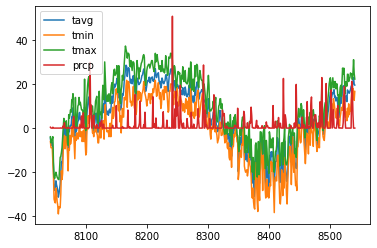

In [ ]:
station_dict[list(station_dict_imp.keys())[8]][['tavg','tmin','tmax','prcp']].tail(500).plot()

<Axes: >

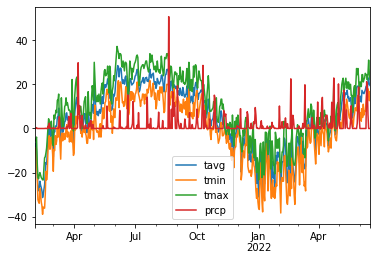

In [ ]:
station_dict_imp[list(station_dict_imp.keys())[8]][['tavg','tmin','tmax','prcp']][-500:].plot()

Weird, hogy az esőzést engedte negatívba menni

# Tanulóhalmaz konstruálása

In [ ]:
crops.keys()

dict_keys(['AITKIN', 'ANOKA', 'BECKER', 'BELTRAMI', 'BENTON', 'BIG STONE', 'BLUE EARTH', 'BROWN', 'CARLTON', 'CARVER', 'CASS', 'CHIPPEWA', 'CHISAGO', 'CLAY', 'CLEARWATER', 'COTTONWOOD', 'CROW WING', 'DOUGLAS', 'FARIBAULT', 'FREEBORN', 'GRANT', 'HENNEPIN', 'HUBBARD', 'ISANTI', 'ITASCA', 'JACKSON', 'KANABEC', 'KANDIYOHI', 'KITTSON', 'KOOCHICHING', 'LAC QUI PARLE', 'LAKE', 'LAKE OF THE WOODS', 'LE SUEUR', 'LINCOLN', 'LYON', 'MAHNOMEN', 'MARSHALL', 'MARTIN', 'MCLEOD', 'MEEKER', 'MILLE LACS', 'MORRISON', 'MURRAY', 'NICOLLET', 'NOBLES', 'NORMAN', 'OTTER TAIL', 'PENNINGTON', 'PINE', 'PIPESTONE', 'POLK', 'POPE', 'RAMSEY', 'RED LAKE', 'REDWOOD', 'RENVILLE', 'RICE', 'ROCK', 'ROSEAU', 'SCOTT', 'SHERBURNE', 'SIBLEY', 'ST. LOUIS', 'STEARNS', 'STEELE', 'STEVENS', 'SWIFT', 'TODD', 'TRAVERSE', 'WADENA', 'WASECA', 'WASHINGTON', 'WATONWAN', 'WILKIN', 'WRIGHT', 'YELLOW MEDICINE', 'COOK', 'OTHER (COMBINED) COUNTIES'])

In [ ]:
stlcorn = crops['AITKIN']['CORN']
stlcorn

,Year,County,Commodity,Crop,ACRES HARVESTED,"PRODUCTION, MEASURED IN BU","YIELD, MEASURED IN BU / ACRE"
0,1950,AITKIN,CORN,"CORN, GRAIN","4,800","72,000",15.0
1,1951,AITKIN,CORN,"CORN, GRAIN","4,000","128,000",32.0
2,1952,AITKIN,CORN,"CORN, GRAIN","3,300","105,600",32.0
3,1953,AITKIN,CORN,"CORN, GRAIN","3,000","87,000",29.0
4,1954,AITKIN,CORN,"CORN, GRAIN","2,700","86,400",32.0
...,...,...,...,...,...,...,...
108,2020,AITKIN,CORN,"CORN, GRAIN",690,"92,900",134.6
109,2020,AITKIN,CORN,"CORN, SILAGE","1,300",NaN,NaN
110,2021,AITKIN,CORN,CORN,NaN,NaN,NaN
111,2021,AITKIN,CORN,"CORN, GRAIN",800,"76,000",95.0


In [ ]:
crops['ST. LOUIS']['CORN']

<Axes: >

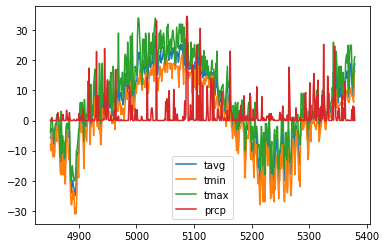

In [ ]:
station_dict['KDYT0'].dropna().plot()

<Axes: xlabel='date'>

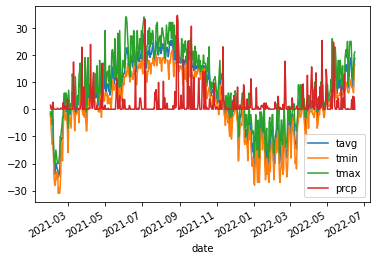

In [ ]:
station_dict_imp['KDYT0'][['tavg', 'tmin', 'tmax', 'prcp']][-500:].plot()

In [ ]:
closest_stations = find_closest_n(county_loc_ds,station_loc_ds,county_ds_abbr[county_ds_abbr.columns[-1]],station_ds[station_ds.columns[0]],n=1)
closest_stations

,county_abbr,0
0,AITKIN,KHZX0
1,ANOKA,9NRIJ
2,BECKER,KDTL0
3,BELTRAMI,72755
4,BENTON,72655
...,...,...
82,WATONWAN,KJYG0
83,WILKIN,KFFM0
84,WINONA,KONA0
85,WRIGHT,KCFE0


In [ ]:
ds
ds["county_abbr"]
station_dict_imp
ds

,county_abbr,0,1
0,AITKIN,KHZX0,KAIT0
1,ANOKA,9NRIJ,KMIC0
2,BECKER,KDTL0,KFFM0
3,BELTRAMI,72755,KY490
4,BENTON,72655,KPNM0
...,...,...,...
82,WATONWAN,KJYG0,KULM0
83,WILKIN,KFFM0,KETH0
84,WINONA,KONA0,KFKA0
85,WRIGHT,KCFE0,KMGG0


In [106]:
crops[ds["county_abbr"][0]].keys()


dict_keys(['BARLEY', 'CORN', 'FLAXSEED', 'HAY', 'OATS', 'RYE', 'SOYBEANS', 'WHEAT', 'SUGARBEETS', 'SUNFLOWER', 'BEANS', 'CANOLA'])

In [ ]:
this = station_dict_imp[ds[0][0]][:]["date"]
that = pd.DataFrame.from_dict(this)
that['date']= pd.to_datetime(that['date'])
that.groupby(that.date.dt.year).count()

,date
date,
2006,175
2007,332
2008,199
2009,350
2010,322
2011,350
2012,272
2013,279
2014,74


In [ ]:
count=0
for county in ds["county_abbr"]:
  print(county)
  try:
    county_crops = crops[county]["CORN"].Year.unique()
  except KeyError:
    pass
  print(county_crops)
  for i in range(2):
    this = station_dict_imp[ds[i][count]]["year"]
    print(ds[i][count])
    print(this.unique())
  count+=1    

# Getting the useful data out

In [46]:
closest_stations = find_closest_n(county_loc_ds,station_loc_ds,county_ds_abbr[county_ds_abbr.columns[-1]],station_ds[station_ds.columns[0]],n=1)
closest_stations

,county_abbr,0
0,AITKIN,KHZX0
1,ANOKA,9NRIJ
2,BECKER,KDTL0
3,BELTRAMI,72755
4,BENTON,72655
...,...,...
82,WATONWAN,KJYG0
83,WILKIN,KFFM0
84,WINONA,KONA0
85,WRIGHT,KCFE0


sort for only those states where is relevant data

In [45]:
def sorter(n):
    closest_stations = find_closest_n(county_loc_ds,station_loc_ds,county_ds_abbr[county_ds_abbr.columns[-1]],station_ds[station_ds.columns[0]],n=n)
    relevant = closest_stations.copy(deep = True)
    l = []
    for i in range(len(relevant.values)):
        if(relevant['county_abbr'][i] not in crops.keys()):
            
            l.append(i)
    return relevant.drop(l).reset_index(drop = True)

In [38]:
del crops['OTHER (COMBINED) COUNTIES']

KeyError: 'OTHER (COMBINED) COUNTIES'

In [58]:
def get_useful_weather_preds_for_commodity(commodity = 'CORN',n=1):
    #n means the number of places our algo will look at when making the feature set
    relevant = sorter(n)
    harvest = []
    weather = []
    index = 0
    for ca in crops.keys():
        crps = crops[ca][commodity].dropna()
        years = crps['Year']
        crp_min_year = np.min(years)
        crp_max_year = np.max(years)

        if(len(years)!=0 ):
            #ha dict lenne:
            #corn[ca] = crps
            #ha lista lenne:
            harvest.append(crps)
            temp_l = []
            for i in range(n):
                temp_l.append(station_dict_imp[relevant[i][index]]
                [(station_dict_imp[relevant[i][index]]['year']>=crp_min_year)
                & (station_dict_imp[relevant[i][index]]['year']<=crp_max_year)])
                
            weather.append(temp_l)
        index +=1
    return weather,harvest    

In [60]:
u_vals = ['BARLEY',
 'CORN, GRAIN',
 'FLAXSEED',
 'OATS',
 'RYE',
 'SOYBEANS',
 'WHEAT',
 'WHEAT, SPRING, (EXCL DURUM)',
 'WHEAT, SPRING, DURUM',
 'WHEAT, WINTER']

In [59]:
u_keys = ['BARLEY',
 'CORN',
 'FLAXSEED',
 'OATS',
 'RYE',
 'SOYBEANS',
 'WHEAT',
 'WHEAT',
 'WHEAT',
 'WHEAT']

In [63]:
def get_useful_weather_preds_for_commodity_and_crop(commodity = 'CORN',exact_crop = 'CORN, GRAIN',n=1):
    #n means the number of places our algo will look at when making the feature set
    relevant = sorter(n)
    harvest = []
    weather = []
    index = 0
    for ca in crops.keys():
        crps = crops[ca][commodity][crops[ca][commodity]['Crop']==exact_crop].dropna()
        years = crps['Year']
        crp_min_year = np.min(years)
        crp_max_year = np.max(years)

        if(len(years)!=0 ):
            #ha dict lenne:
            #corn[ca] = crps
            #ha lista lenne:
            harvest.append(crps)
            temp_l = []
            for i in range(n):
                temp_l.append(station_dict_imp[relevant[i][index]]
                [(station_dict_imp[relevant[i][index]]['year']>=crp_min_year)
                & (station_dict_imp[relevant[i][index]]['year']<=crp_max_year)])
                
            weather.append(temp_l)
        index +=1
    return weather,harvest    

In [66]:
l_weather,l_commod = [],[]
index = 0
for i in u_keys:
    w,c = get_useful_weather_preds_for_commodity_and_crop(i,u_vals[index],2)
    if(len(w)>0 and len(c)>0):
        l_weather.append(w)
        l_commod.append(c)
    index +=1

In [84]:
d_weather,d_commod = dict.fromkeys(u_vals),dict.fromkeys(u_vals)
index = 0
for i in u_vals:
    w,c = get_useful_weather_preds_for_commodity_and_crop(u_keys[index],i,2)
    if(len(w)>0 and len(c)>0):
        d_weather[i] =w
        d_commod[i] = c
    index +=1

In [95]:
d_weather[u_vals[5]][3]

[                 tavg  tmin  tmax  prcp    year  month   day
 1955-01-01 -11.770750 -17.2  -4.4   0.0  1955.0    1.0   1.0
 1955-01-02 -17.361573 -22.8 -10.0   0.0  1955.0    1.0   2.0
 1955-01-03 -14.313792 -18.3  -8.3   0.0  1955.0    1.0   3.0
 1955-01-04  -7.695720 -11.1  -2.2   0.0  1955.0    1.0   4.0
 1955-01-05 -11.023323 -15.0  -5.0   0.0  1955.0    1.0   5.0
 ...               ...   ...   ...   ...     ...    ...   ...
 2021-12-27  -9.000000 -20.5  -4.6  10.2  2021.0   12.0  27.0
 2021-12-28 -18.800000 -23.7 -14.7   4.3  2021.0   12.0  28.0
 2021-12-29 -23.600000 -29.2 -19.0  12.7  2021.0   12.0  29.0
 2021-12-30 -18.500000 -22.7 -15.2   0.0  2021.0   12.0  30.0
 2021-12-31 -23.300000 -32.4 -16.7   0.3  2021.0   12.0  31.0
 
 [24472 rows x 7 columns],
             tavg  tmin  tmax       prcp    year  month   day
 2020-01-15 -18.6 -24.0 -15.0  -0.756037  2020.0    1.0  15.0
 2020-01-16 -25.3 -30.0 -20.0  -0.735595  2020.0    1.0  16.0
 2020-01-17 -13.1 -23.0  -8.0  -3.082664 

In [64]:
l_keys

['BARLEY',
 'CORN',
 'FLAXSEED',
 'HAY',
 'OATS',
 'RYE',
 'SOYBEANS',
 'WHEAT',
 'SUGARBEETS',
 'SUNFLOWER',
 'BEANS',
 'CANOLA']

In [123]:
len(list(crops.keys()))

78

In [48]:
l_keys = list(crops[list(crops.keys())[1]].keys())
l_weather,l_crop = [],[]
for i in l_keys:
    w,c = get_useful_weather_preds_for_commodity(i,2)
    if(len(w)>0 and len(c)>0):
        l_weather.append(w)
        l_crop.append(c)


In [53]:
l_keys[0]

'BARLEY'

In [ ]:
l_crop[0][0]['Crop']

In [137]:
len(l_keys)

12

In [57]:
unique_crops = []
for i in range(len(l_crop)):
    unique_crops.extend(list(l_crop[i][0]['Crop'].unique()))

In [160]:
unique_crops

['BARLEY',
 'CORN, GRAIN',
 'FLAXSEED',
 'OATS',
 'RYE',
 'SOYBEANS',
 'WHEAT',
 'WHEAT, SPRING, (EXCL DURUM)',
 'WHEAT, SPRING, DURUM',
 'WHEAT, WINTER']

In [159]:
len(unique_crops)

10

In [123]:
weather,corn = get_useful_weather_preds_for_commodity(n=3)

min(weather[0][0].index)
max(weather[0][0].index)

Timestamp('2021-12-31 00:00:00', freq='D')

In [40]:
corn[0].columns

Index(['Year', 'County', 'Commodity', 'Crop', 'ACRES HARVESTED',
       'PRODUCTION, MEASURED IN BU', 'YIELD, MEASURED IN BU / ACRE'],
      dtype='object')

# Feature generation

A crops és a weather is egy egy DF
ebből csinálunk egy feature setet

## corn

### Komplex modell

In the United States, corn planting typically begins in April or May, depending on the region and weather conditions. Corn emergence can occur as early as late April in the southern United States and as late as June in the northern United States.

- 'year', year of harvest
- 'harv_acr', harvested acres
- 'prod_in_bu',PRODUCTION, MEASURED IN BU
- 'yield_in_bu_per_acr',YIELD, MEASURED IN BU / ACRE
- 'tmax', max temp
- 'tavg', avg temp
- 'tmin', min temp
- 'tmed', med temp
- 'prcpts', total percipitation
- 'avg_prcpt', avg percipitation 
- 'tmaxt', max temp trend angle
- 'tavgt', avg temp trend angle
- 'tmint', min temp trend angle
- 'tmedt', med temp trend angle
- 'prcptst', total percipitation trend angle
- 'avg_prcptt', avg percipitation trend angle
- 'tid', the avg temperature deviation from the ideal 15-32°C from april to september
- 'tidd', days when the avg tmp is not in the range of 15-32°C from april to september
- 'tregslope', slope of the linear regression in temperatures
- 'gstagefrost', number of frosty days in the typical planting season of april to june
- 'gstagetavg', the avg temperature the typical planting season of april to june
- 'gstagemin',the min temperature the typical planting season of april to june
- 'gstagemax', the max temperature the typical planting season of april to june

In [ ]:
cols = ['year', 'harv_acr', 'prod_in_bu', 'yield_in_bu_per_acr', 'tmax', 'tavg','tmin','tmed','prcpts',
            'avg_prcpt','tmaxt','tavgt','tmint', 'tmedt','prcptst', 'avg_prcptt','tid', 'tidd','tregslope',
            'gstagefrost', 'gstagetavg','gstagemin','gstagemax']

In [ ]:
cols = ['year', 'yield', 'tmax', 'tavg','tmin','tmed','prcptavg','prcptmax']
#a df egy weather adathalmaz lesz amiből kiszopkodjuk az adatot
def get_features(weather,crop):
    training_set = pd.DataFrame(columns=cols)
    feat_dict = dict.fromkeys(cols, 0)
    if(len(weather['year'])>0):
        for i in crop['Year'][(crop['Year']>min(weather['year']))]:
            #i = 2007
            feat_dict['year'] = i
            feat_dict['yield'] = crop[(crop['Year'] == i)]['YIELD, MEASURED IN BU / ACRE'].values[0]
            feat_dict['tmax'] = np.max(weather[(weather['year']==i)]['tmax'])
            feat_dict['tmin'] = np.min(weather[(weather['year']==i)]['tmin'])
            feat_dict['tavg'] = np.average(weather[(weather['year']==i)]['tavg'])
            feat_dict['tmed'] = np.median(weather[(weather['year']==i)]['tavg'])
            feat_dict['prcptavg'] = np.average(weather[(weather['year']==i)]['prcp'])
            feat_dict['prcptmax'] = np.max(weather[(weather['year']==i)]['prcp'])

            featdf = pd.DataFrame([feat_dict])
            training_set = pd.concat([training_set,featdf], ignore_index=True)

    return training_set

In [ ]:
corn[0]['year'][(corn[0]['year']>min(weather[0][0]['year']))]

In [ ]:
#crops[list(crops.keys())[0]]['CORN']

In [ ]:
get_features(weather = weather[0][0],crop=corn[0])

2007
2010
2013
2014
2016
2018
2020
2021


,year,harv_acr,prod_in_bu,yield_in_bu_per_acr,tmax,tavg,tmin,tmed,ti,tregslope,gstagefrost,gstagetavg,gstagemin,gstagemax


### Egyszerűsített modell

In [122]:
cols = ['year', 'yield', 'tmax', 'tavg','tmin','tmed','prcptavg','prcptmax']
#a df egy weather adathalmaz lesz amiből kiszopkodjuk az adatot
def get_features(weather,crop):
    training_set = pd.DataFrame(columns=cols)
    feat_dict = dict.fromkeys(cols, 0)
    if(len(weather['year'])>0):
        for i in crop['Year'][(crop['Year']>min(weather['year']))]:
            #i = 2007
            feat_dict['year'] = i
            feat_dict['yield'] = crop[(crop['Year'] == i)]['YIELD, MEASURED IN BU / ACRE'].values[0]
            feat_dict['tmax'] = np.max(weather[(weather['year']==i)]['tmax'])
            feat_dict['tmin'] = np.min(weather[(weather['year']==i)]['tmin'])
            feat_dict['tavg'] = np.average(weather[(weather['year']==i)]['tavg'])
            feat_dict['tmed'] = np.median(weather[(weather['year']==i)]['tavg'])
            feat_dict['prcptavg'] = np.average(weather[(weather['year']==i)]['prcp'])
            feat_dict['prcptmax'] = np.max(weather[(weather['year']==i)]['prcp'])
            featdf = pd.DataFrame([feat_dict])
            training_set = pd.concat([training_set,featdf], ignore_index=True)

    return training_set

In [42]:
corn[0][(corn[0]['Year'] == 2007)]['YIELD, MEASURED IN BU / ACRE'].values[0]

80.0

In [120]:
def get_learning_feature_matrix(weather,crop,cols):
    end_df = pd.DataFrame(columns = cols)
    for i in range(len(crop)):
        for j in range(len(weather[0])):
            end_df = pd.concat([end_df, get_features(weather = weather[i][j],crop = crop[i])],ignore_index = True)
    return end_df.reset_index(drop = True)

In [44]:
get_learning_feature_matrix(weather,corn,cols).dropna().reset_index(drop = True)

,year,yield,tmax,tavg,tmin,tmed,prcptavg,prcptmax
0,2007,80.0,33.0,5.626074,-31.0,5.300000,2.499501,11.100000
1,2010,140.0,31.0,5.296983,-33.0,5.132708,2.602179,7.115642
2,2013,74.2,33.0,5.064223,-30.0,5.139104,2.792517,6.435965
3,2014,81.6,12.0,1.740097,-33.0,5.138043,2.493000,4.854302
4,2016,113.5,32.0,7.122373,-30.0,6.050000,3.285536,6.351902
...,...,...,...,...,...,...,...,...
3202,2016,200.0,33.9,7.928142,-33.2,9.350000,2.347814,103.600000
3203,2017,192.0,33.3,7.035616,-31.0,8.200000,2.105479,39.400000
3204,2018,187.5,36.1,5.947671,-29.9,4.300000,1.934795,44.500000
3205,2019,173.0,33.3,5.184110,-36.6,5.900000,2.918082,53.300000


In [ ]:
np.sum(weather[0][0][(weather[0][0]['year']==2007)]['prcp'])

833.525279527341

In [46]:
weather[0][0][(weather[0][0]['year']==2007)]['tmax']

2007-01-01     0.000000
2007-01-02     0.000000
2007-01-03    10.662378
2007-01-04     1.000000
2007-01-05     1.000000
                ...    
2007-12-27    -6.000000
2007-12-28    -7.000000
2007-12-29    -6.000000
2007-12-30    -5.000000
2007-12-31     9.662734
Freq: D, Name: tmax, Length: 365, dtype: float64

Itt megfogjuk és leszűkítjük az adatainkat egy sorba és csinálunk egy prediction targetet 
Alapvetően a crop yieldre fog rátanulni, de kovariánsként belerakjuk a kinyert időjárásadatokat is
A cornnál fontos a jégeső pl és a csapadék
mindnél a csapadék de Szerdán ennek utánna kell nézni

note:
most jutott eszembe hogy mi lenne ha klaszterezném a target előrejelzéseket, hogy melyikhez hasonlítanak a legjobban és azokkal állítanám párba őket...

# Modellezés

## Setup of training and testing sploinky yoinky

In [118]:
from sklearn.metrics import r2_score

In [124]:
features = get_learning_feature_matrix(weather,corn,cols).dropna().reset_index(drop = True)
features = features.apply(pd.to_numeric)

In [125]:
features.dtypes

year          int64
yield       float64
tmax        float64
tavg        float64
tmin        float64
tmed        float64
prcptavg    float64
prcptmax    float64
dtype: object

<AxesSubplot:>

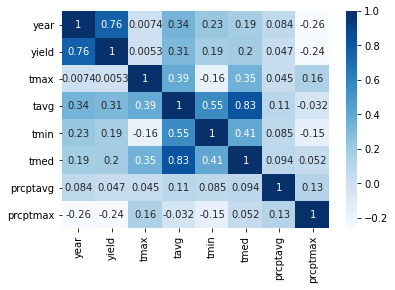

In [49]:
#plt.pyplot.imshow(features.corr(),cmap='hot',interpolation='nearest')
import seaborn as sb
corr = features.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

In [126]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(features, test_size=0.2)


In [51]:
list(train.columns)[0]

'year'

In [127]:
X_train = pd.concat([train[list(train.columns)[0]],train[list(train.columns)[2:]]],axis=1).reset_index(drop = True)
y_train = train['yield'].reset_index(drop = True)
X_test = pd.concat([test[list(test.columns)[0]],test[list(test.columns)[2:]]],axis=1).reset_index(drop = True)
y_test = test['yield'].reset_index(drop = True)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [94]:

X_train = scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

## Dummy baseline

Just for good measures I will implement a Dummy regressor for a stable baseline

-0.09006995793060324

In [ ]:
from sklearn.dummy import DummyRegressor

In [ ]:
model = DummyRegressor(strategy="median")

In [ ]:
model.fit(X_train,y_train)

DummyRegressor(strategy='median')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.6467592761339331

In [ ]:
ax, fig = plt.plot()
prediction,

## GridSearchCV

0.6713717191683236 without parameters

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


In [128]:
model = GradientBoostingRegressor()


In [129]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [130]:
y_pred =model.predict(X_test)

In [131]:
r2_score(y_test, y_pred)

0.7093613297117705

In [ ]:
parameters = {'learning_rate': [0.1,0.02,0.03,0.04],
                  'subsample'    : [1.0,0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [3,4,6,8,10],
                  'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
                  'max_features' :['auto', 'sqrt', 'log2']
                 }

grid_GBR = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


In [ ]:
y_pred =grid_GBR.predict(X_test)

<Axes: >

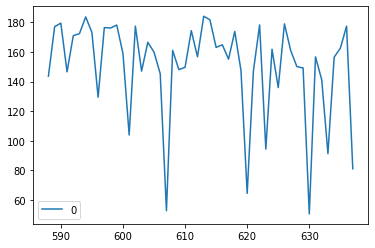

In [ ]:
pd.DataFrame(data = y_pred ).tail(50).plot()

## Linear Regressor

0.5902965746370067

In [84]:
from sklearn.linear_model import LinearRegression

In [95]:
model = LinearRegression()


In [96]:
model.fit(X_train,y_train)

LinearRegression()

In [97]:
y_pred = model.predict(X_test)

In [98]:
r2_score(y_test, y_pred)

0.5856979646345779

## KMeans Regressor

0.48966761329351205

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor(n_neighbors=3)

In [ ]:
model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.48966761329351205

## DT Regressor

0.4195338593729637

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [54]:
model = DecisionTreeRegressor()

In [78]:
model = RandomForestRegressor(n_estimators=100)

In [75]:
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1500)

In [76]:
y_pred = model.predict(X_test)

In [77]:
r2_score(y_test, y_pred)

0.5684189651672177

## Other sols

In [56]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
models = [ElasticNet(l1_ratio=0.2),BayesianRidge(n_iter=500),GradientBoostingRegressor()]
for i in models:
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    print(r2_score(y_test,y_pred))


0.07068087982086024
0.5862070694066619
0.6456271847167715


## Deep Learning

In [58]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

In [64]:
torch.manual_seed(42)

device = "cpu"

if torch.cuda.is_available():
    device = torch.device("cuda")

In [235]:
import torch

class Net(torch.nn.Module):

    def __init__(self, inputSize, outputSize):
        super(Net, self).__init__()
        self.linear = torch.nn.Linear(inputSize, 50)
        self.linear2 = torch.nn.Linear(50, outputSize)
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        x = self.linear(x)
        x = self.dropout(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x

In [84]:
len(X_train.columns)

7

In [221]:
inputDim = 7        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.001
epochs = 10000

model = Net(inputDim, outputDim)
criterion = torch.nn.L1Loss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)


In [222]:
from torch.nn.functional import normalize
train_data_tensor = torch.tensor(X_train.values.astype(np.float32))
train_target_tensor = torch.tensor(y_train.values.astype(np.float32))
train_data_tensor_norm = normalize(train_data_tensor,p=2.0, dim = 0)


test_data_tensor = torch.tensor(X_test.values.astype(np.float32))
test_data_tensor_norm = normalize(test_data_tensor,p=1.0, dim = 0)
test_target_tensor = torch.tensor(y_test.values.astype(np.float32))

In [223]:
for epoch in range(epochs):
    inputs = train_data_tensor_norm
    labels = train_target_tensor

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()), end='\r')

c:\Users\XY\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\loss.py:96: UserWarning: Using a target size (torch.Size([2565])) that is different to the input size (torch.Size([2565, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


In [224]:
with torch.no_grad(): # we don't need gradients in the testing phase
    predicted = model(test_data_tensor_norm).data.numpy()
    y_pred = pd.DataFrame(predicted)
y_pred
r2_score(y_true=y_test,y_pred=y_pred)

-0.4828113063020478

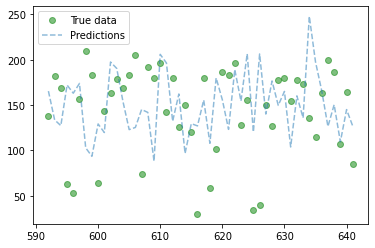

In [225]:

plt.pyplot.clf()
plt.pyplot.plot(y_test.tail(50), 'go', label='True data', alpha=0.5)
plt.pyplot.plot(y_pred.tail(50), '--', label='Predictions', alpha=0.5)
plt.pyplot.legend(loc='best')
plt.pyplot.show()


In [232]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import numpy as np
from skorch import NeuralNetRegressor

## if you value your time do not run this cell

In [240]:
# create model with skorch
model = NeuralNetRegressor(
    Net(inputDim, outputDim),
    max_epochs=50,
)
param_grid = {
    'optimizer__lr': [0.001, 0.002,  0.003,  0.02,  0.03],
    'optimizer__momentum': [0.0, 0.2, 0.4, 0.6, 0.8, 0.9],
    'optimizer': [optim.SGD, optim.RMSprop, optim.Adagrad, optim.Adadelta,
                  optim.Adam, optim.Adamax]
}
grid = GridSearchCV(model,param_grid)
grid_result= grid.fit(train_data_tensor,train_target_tensor.reshape(-1,1))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_), end='\r')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

  epoch           train_loss       valid_loss     dur
-------  -------------------  ---------------  ------
      1  40618434442426.9062  1736186956.3017  0.0330
      2  1696056567.5759  1648117663.7664  0.0300
      3  1610031202.6715  1564516131.5036  0.0330
      4  1528369470.7910  1485155008.4672  0.0310
      5  1450849684.2803  1409819269.2944  0.0310
      6  1377261885.9330  1338305274.3942  0.0300
      7  1307406439.9756  1270418167.9027  0.0300
      8  1241094027.1542  1205975157.4112  0.0380
      9  1178145576.9506  1144800723.4647  0.0310
     10  1118389583.6392  1086728929.7908  0.0300
     11  1061664037.2846  1031602868.3212  0.0280
     12  1007815912.5606  979273083.3285  0.0280
     13  956699181.1237  929597881.9270  0.0300
     14  908175060.2023  882442101.4112  0.0330
     15  862112056.2389  837678396.4185  0.0310
     16  818385374.6935  795185052.6521  0.0280
     17  776876440.4144  754847300.2044  0.0310
     18  737472894.3230  716555472.5061  0.0280
 

c:\Users\XY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\XY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\XY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\XY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "c:\Users\XY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\Users\XY\AppData\Local\

      7           inf           inf  0.0320
      8           inf           inf  0.0260
      9           inf           inf  0.0540
     10           inf           inf  0.0290
     11           inf           inf  0.0280
     12           inf           inf  0.0300
     13           inf           inf  0.0270
     14           inf           inf  0.0310
     15           inf           inf  0.0340
     16           inf           inf  0.0340
     17           inf           inf  0.0310
     18           inf           inf  0.0260
     19           inf           inf  0.0260
     20           inf           inf  0.0270
     21           inf           inf  0.0310
     22           inf           inf  0.0320
     23           inf           inf  0.0300
     24           inf           inf  0.0300
     25           inf           inf  0.0320
     26           inf           inf  0.0360
     27           inf           inf  0.0270
     28           inf           inf  0.0280
     29           inf           

c:\Users\XY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\XY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\XY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\XY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "c:\Users\XY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\Users\XY\AppData\Local\

      5  508655100197603003624062976.0000  456390489299278394921320448.0000  0.0430
      6  418075721742778088575467520.0000  375118266981186621440786432.0000  0.0400
      7  343626410684197330346835968.0000  308318603746820340066549760.0000  0.0370
      8  282434726569154791828619264.0000  253414452555594179018752000.0000  0.0300
      9  232139885487194583842422784.0000  208287353636425087619956736.0000  0.0310
     10  190801250291707699647217664.0000  171196282413232481380597760.0000  0.0310
     11  156824084512167713493221376.0000  140710343394962784091373568.0000  0.0310
     12  128897433314420761668091904.0000  115653179700493402440204288.0000  0.0306
     13  105943878504234889208922112.0000  95058092130301390673149952.0000  0.0310
     14  87077789116444154408206336.0000  78130492771294041761382400.0000  0.0270
     15  71571299703215975840088064.0000  64217316457673310288740352.0000  0.0260
     16  58826158399327349868855296.0000  52781737993395416449679360.0000  0.0270

c:\Users\XY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\XY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\XY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\XY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "c:\Users\XY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\Users\XY\AppData\Local\


      7  728400838221477283951362051145728.0000  390456656138437953762986060414976.0000  0.0460
      8  252012732852967523926016075497472.0000  135090525943433500760469053374464.0000  0.0420
      9  87191579489544052017646285094912.0000  46738735668229353623885159858176.0000  0.0300
     10  30166617713997527071313071439872.0000  16170706611118143230641407262720.0000  0.0310
     11  10437071853491518626547940458496.0000  5594755684641838135464448491520.0000  0.0310
     12  3611026974972906767018664919040.0000  1935677922936516479883960909824.0000  0.0280
     13  1249346207474819534226896977920.0000  669707427366096509282805612544.0000  0.0260
     14  432249807546621936738337030144.0000  231706027002964017087005065216.0000  0.0340
     15  149550200406509578025519022080.0000  80165835603102934347175428096.0000  0.0330
     16  51741502427782632788992196608.0000  27735851607120100296478425088.0000  0.0290
     17  17901572121160252262407208960.0000  9596074776486486458494877696.00

# Utolsó Lépés: predikció


## Simple predictor

In [108]:
def pipeline():
    target_names = list(target_dict.keys())
    os.makedirs('predictions/', exist_ok=True)
    done = os.listdir('predictions/')
    for i in done:
        name = i.split('.')[0]
        if(name in target_names):
            del target_names[i]
    for i in target_names:
        index = 0
        #minden egyes targethez itt az i = 'ADSFEVDKDFLKJDKOF'
        
        merged_pred_targs = pd.DataFrame(columns=['Target location','Year','Crop','Predicted yield (BU/acre)'])
        merged_pred_targs.to_csv(f'predictions/{i}.csv',header=True,index=False)  

In [ ]:
def predictor_builder(features):
    model = GradientBoostingRegressor()
    X_train = pd.concat([features[list(features.columns)[0]],features[list(features.columns)[2:]]],axis=1).reset_index(drop = True)
    y_train = features['yield'].reset_index(drop = True)
    model.fit(X_train,y_train)
    return model

In [113]:
def predictor(data):
    features = get_target_features(data)
    model = predictor_builder(features)
    

In [ ]:
GradientBoostingRegressor()

In [179]:
target_names = list(target_dict.keys())
feat_dict = dict.fromkeys(target_names, [])

197

In [178]:
cols = ['year', 'tmax', 'tavg','tmin','tmed','prcptavg','prcptmax']
#a df egy weather adathalmaz lesz amiből kiszopkodjuk az adatot
def get_target_features(weather):
    training_set = pd.DataFrame(columns=cols)
    feat_dict = dict.fromkeys(cols, 0)
    if(len(weather['year'])>0 or len(weather.values)>0):
        for i in weather['year'].unique():
            #i = 2007
            feat_dict['year'] = i
            #feat_dict['yield'] = crop[(crop['Year'] == i)]['YIELD, MEASURED IN BU / ACRE'].values[0]
            feat_dict['tmax'] = np.max(weather[(weather['year']==i)]['tmax'])
            feat_dict['tmin'] = np.min(weather[(weather['year']==i)]['tmin'])
            feat_dict['tavg'] = np.average(weather[(weather['year']==i)]['tavg'])
            feat_dict['tmed'] = np.median(weather[(weather['year']==i)]['tavg'])
            feat_dict['prcptavg'] = np.average(weather[(weather['year']==i)]['prcp'])
            feat_dict['prcptmax'] = np.max(weather[(weather['year']==i)]['prcp'])
            featdf = pd.DataFrame([feat_dict])
            training_set = pd.concat([training_set,featdf], ignore_index=True)

    return training_set

In [180]:
len(weather[0][0].values)

5844

In [181]:
X_train = pd.concat([features[list(features.columns)[0]],features[list(features.columns)[2:]]],axis=1).reset_index(drop = True)
y_train = features['yield'].reset_index(drop = True)
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [144]:
features

,year,yield,tmax,tavg,tmin,tmed,prcptavg,prcptmax
0,2007,80.0,33.0,5.626074,-31.0,5.300000,2.499501,11.100000
1,2010,140.0,31.0,5.296983,-33.0,5.132708,2.602179,7.115642
2,2013,74.2,33.0,5.064223,-30.0,5.139104,2.792517,6.435965
3,2014,81.6,12.0,1.740097,-33.0,5.138043,2.493000,4.854302
4,2016,113.5,32.0,7.122373,-30.0,6.050000,3.285536,6.351902
...,...,...,...,...,...,...,...,...
3202,2016,200.0,33.9,7.928142,-33.2,9.350000,2.347814,103.600000
3203,2017,192.0,33.3,7.035616,-31.0,8.200000,2.105479,39.400000
3204,2018,187.5,36.1,5.947671,-29.9,4.300000,1.934795,44.500000
3205,2019,173.0,33.3,5.184110,-36.6,5.900000,2.918082,53.300000


In [143]:
X_train

,year,tmax,tavg,tmin,tmed,prcptavg,prcptmax
0,2007,33.0,5.626074,-31.0,5.300000,2.499501,11.100000
1,2010,31.0,5.296983,-33.0,5.132708,2.602179,7.115642
2,2013,33.0,5.064223,-30.0,5.139104,2.792517,6.435965
3,2014,12.0,1.740097,-33.0,5.138043,2.493000,4.854302
4,2016,32.0,7.122373,-30.0,6.050000,3.285536,6.351902
...,...,...,...,...,...,...,...
3202,2016,33.9,7.928142,-33.2,9.350000,2.347814,103.600000
3203,2017,33.3,7.035616,-31.0,8.200000,2.105479,39.400000
3204,2018,36.1,5.947671,-29.9,4.300000,1.934795,44.500000
3205,2019,33.3,5.184110,-36.6,5.900000,2.918082,53.300000


In [212]:
def predict_all_targets_corn(target_dict,imputer,model):
    target_names = list(target_dict.keys())
    preds = dict.fromkeys(target_names, [])
    length = len(target_names)
    counter = 0
    print(f"Progress:{counter}/{length}", end='\r')
    for i in target_dict:
        target_df = target_dict[i]
        target_df_imp = impute(target_df,imputer)
        feats = get_target_features(target_df_imp)
        pred_df = pd.DataFrame(data = model.predict(feats),index=feats['year'].unique().astype(np.int64))
        preds[i] = pred_df
        counter +=1
        print(f"Progress:{counter}/{length}", end='\r')
    return preds
        

In [195]:
target_dict[list(target_dict.keys())[55]]

,date,tavg,tmin,tmax,prcp
0,2007-06-07,12.67,6.85,14.34,NaN
1,2007-06-09,20.26,10.85,26.06,NaN
2,2007-06-10,21.35,12.38,28.95,NaN
3,2007-06-12,19.91,16.13,19.27,NaN
4,2007-06-13,18.96,13.60,25.75,NaN
...,...,...,...,...,...
945,2010-05-10,7.49,1.41,12.34,NaN
946,2010-05-11,9.34,3.85,10.11,NaN
947,2010-05-12,5.90,1.67,5.65,NaN
948,2010-05-14,12.81,0.82,20.49,NaN


In [213]:
preds = predict_all_targets_corn(target_dict = target_dict, imputer = imputer, model = model)

In [245]:
def write_preds_to_file(crop_name):
    cols = ['Target location','Year','Crop','Predicted yield (BU/acre)']
    result = pd.DataFrame(columns=cols)
    for i in preds:
        target_name = i
        prediction = preds[i]
        appendict = dict.fromkeys(cols)
        for y in prediction.index:
            appendict['Target location'] = target_name
            appendict['Year'] =  y
            appendict['Crop'] = crop_name
            appendict['Predicted yield (BU/acre)'] =prediction.loc[y,0]
            result = pd.concat([result,pd.DataFrame(data=appendict,columns = cols, index=[0])])
    return result

In [250]:
predictions_df = write_preds_to_file('""CORN, GRAIN""')


In [ ]:
for i in predictions_df.values:
    print(i)

In [261]:
f = open('predictions.csv','w')
f.write('"')
f.write('Target location,""Year"",""Crop"",""Predicted yield (BU/acre)""')
f.write('"\n')
for i in predictions_df.values:
    f.write('"')
    f.write(f'{i[0]},{i[1]},{i[2]},{i[3]}')
    f.write('"\n')
f.close()